<img src="cubes.png">

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("database.csv", sep="\t")

In [2]:
# Creazione funzione per convertire i secondi in minuti e secondi
def convert_seconds(seconds):
    minutes, seconds = divmod(seconds, 60)
    minutes = int(minutes)
    seconds = round(seconds, 2)
    return f"{minutes}:{seconds}"

In [3]:
# Inserimento colonna "Tempo" con i secondi convertiti in minuti ei secondi
df.insert(loc=2, column="Tempo", value=df["Secondi"].apply(convert_seconds))

In [4]:
# Ultime 10 risoluzioni
df.tail(10)

,Data,Secondi,Tempo,Cubo
126,2025-07-20,802.76,13:22.76,5x5
127,2025-07-20,814.49,13:34.49,5x5
128,2025-08-06,633.18,10:33.18,5x5
129,2025-08-06,797.90,13:17.9,5x5
130,2025-08-10,241.43,4:1.43,4x4
131,2025-08-10,252.54,4:12.54,4x4
132,2025-08-10,241.82,4:1.82,4x4
133,2025-08-10,232.52,3:52.52,4x4
134,2025-08-10,345.13,5:45.13,Mirror
135,2025-08-10,563.77,9:23.77,5x5


# Record personali per tipo di cubo 🥇🥈🥉

In [5]:
# Record personali per tipo di cubo

list_index_records = [] 
cube_types = df["Cubo"].drop_duplicates()
for cube_type in cube_types:
    the_index = df[df["Cubo"] == cube_type].sort_values("Secondi").head(1).index
    list_index_records.append(the_index[0])

df[["Data", "Tempo", "Cubo"]].iloc[list_index_records]

,Data,Tempo,Cubo
94,2025-05-03,0:44.56,3x3
84,2025-03-21,0:15.12,2x2
112,2025-05-28,3:58.89,Mirror
135,2025-08-10,9:23.77,5x5
18,2025-01-18,3:38.12,4x4
48,2025-02-09,30:10.61,Megaminx


In [ ]:
# Oppure si puo fare anche in questo modo
df.groupby(by="Cubo").min().sort_values(by="Secondi").drop(columns=["Data", "Secondi"])
# Senza il drop avrebbe mostrato la data sbagliata in quanto prende pure la data minima in quanto applica min su tutte le colonne
# Anche la colonna Tempo non ha i risultati in ordine per questo motivo

,Tempo
Cubo,
2x2,0:15.12
3x3,0:44.56
4x4,3:38.12
Mirror,12:24.1
5x5,10:33.18
Megaminx,30:10.61


In [ ]:
# Oppure si puo fare anche in questo altro modo
df.groupby(by="Cubo")["Tempo"].min()

Cubo
2x2          0:15.12
3x3          0:44.56
4x4          3:38.12
5x5         10:33.18
Megaminx    30:10.61
Mirror       12:24.1
Name: Tempo, dtype: object

Text(0.5, 0, 'Cubi')

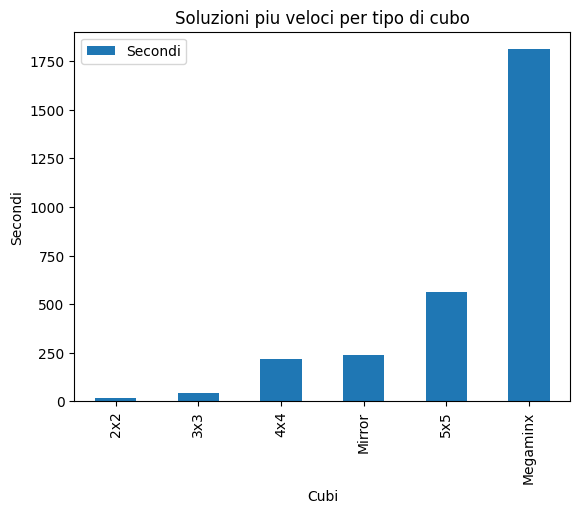

In [8]:
df.groupby(by="Cubo").min().sort_values(by="Secondi").plot.bar()
plt.title("Soluzioni piu veloci per tipo di cubo")
plt.ylabel("Secondi")
plt.xlabel("Cubi")

In [9]:
# Medie dei tempi di risoluzione
medie_df = df.groupby(by="Cubo")["Secondi"].mean().round(2)
medie_df

Cubo
2x2           68.64
3x3           75.71
4x4          280.98
5x5          809.63
Megaminx    2155.38
Mirror       537.60
Name: Secondi, dtype: float64

In [10]:
# Medie dei tempi di risoluzione in minuti e secondi
for i, s in medie_df.items():
    print(i, convert_seconds(s))

2x2 1:8.64
3x3 1:15.71
4x4 4:40.98
5x5 13:29.63
Megaminx 35:55.38
Mirror 8:57.6


Text(0.5, 0, 'Cubi')

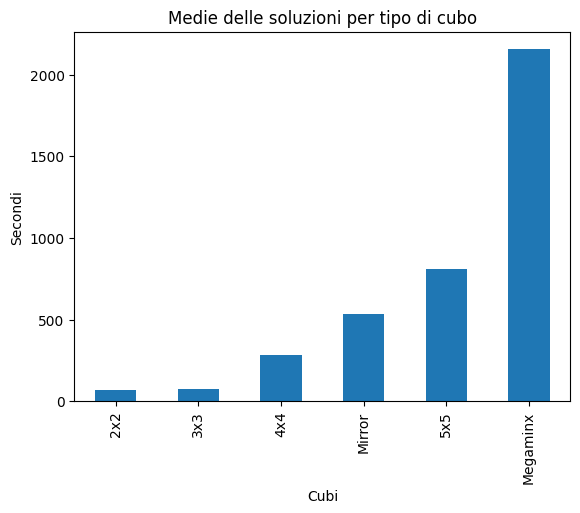

In [11]:
df.groupby(by="Cubo")["Secondi"].mean().sort_values().plot.bar()
plt.title("Medie delle soluzioni per tipo di cubo")
plt.ylabel("Secondi")
plt.xlabel("Cubi")

In [12]:
# Numero di volte che ho risolto i cubi
df["Cubo"].value_counts()

Cubo
3x3         54
2x2         35
4x4         23
5x5         13
Mirror       8
Megaminx     3
Name: count, dtype: int64

Text(0.5, 0, 'Cubi')

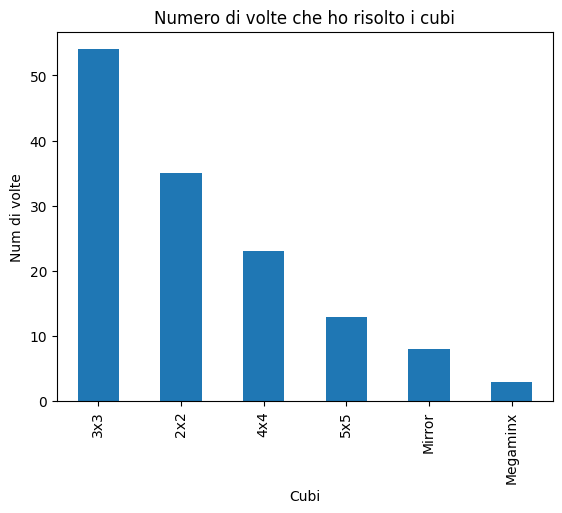

In [13]:
df["Cubo"].value_counts().plot.bar()
plt.title("Numero di volte che ho risolto i cubi")
plt.ylabel("Num di volte")
plt.xlabel("Cubi")

In [14]:
# Detaframe delle soluzioni del cubo 2x2
df_2x2 = df[df["Cubo"] == "2x2"].sort_values(by="Secondi")
df_2x2

,Data,Secondi,Tempo,Cubo
84,2025-03-21,15.12,0:15.12,2x2
81,2025-03-09,15.66,0:15.66,2x2
83,2025-03-21,24.74,0:24.74,2x2
68,2025-02-22,26.90,0:26.9,2x2
30,2025-01-26,28.12,0:28.12,2x2
71,2025-02-23,28.13,0:28.13,2x2
24,2025-01-18,32.24,0:32.24,2x2
70,2025-02-23,35.07,0:35.07,2x2
21,2025-01-18,36.84,0:36.84,2x2
100,2025-05-26,37.40,0:37.4,2x2


In [15]:
# Detaframe delle soluzioni del cubo 3x3
df_3x3 = df[df["Cubo"] == "3x3"].sort_values(by="Secondi")
df_3x3

,Data,Secondi,Tempo,Cubo
94,2025-05-03,44.56,0:44.56,3x3
105,2025-05-28,44.56,0:44.56,3x3
55,2025-02-13,54.39,0:54.39,3x3
59,2025-02-14,54.88,0:54.88,3x3
74,2025-02-23,55.66,0:55.66,3x3
41,2025-02-02,56.01,0:56.01,3x3
78,2025-03-09,56.58,0:56.58,3x3
106,2025-05-28,56.63,0:56.63,3x3
95,2025-05-03,56.63,0:56.63,3x3
86,2025-03-21,57.39,0:57.39,3x3


In [16]:
# Detaframe delle soluzioni del cubo 4x4
df_4x4 = df[df["Cubo"] == "4x4"].sort_values(by="Secondi")
df_4x4

,Data,Secondi,Tempo,Cubo
18,2025-01-18,218.12,3:38.12,4x4
69,2025-02-23,223.11,3:43.11,4x4
17,2025-01-18,227.47,3:47.47,4x4
133,2025-08-10,232.52,3:52.52,4x4
130,2025-08-10,241.43,4:1.43,4x4
110,2025-05-28,241.70,4:1.7,4x4
132,2025-08-10,241.82,4:1.82,4x4
123,2025-07-16,242.52,4:2.52,4x4
25,2025-01-19,246.79,4:6.79,4x4
109,2025-05-28,246.83,4:6.83,4x4


In [17]:
# Detaframe delle soluzioni del cubo 5x5
df_5x5 = df[df["Cubo"] == "5x5"].sort_values(by="Secondi")
df_5x5

,Data,Secondi,Tempo,Cubo
135,2025-08-10,563.77,9:23.77,5x5
128,2025-08-06,633.18,10:33.18,5x5
76,2025-03-08,652.34,10:52.34,5x5
62,2025-02-21,740.90,12:20.9,5x5
125,2025-07-20,791.13,13:11.13,5x5
129,2025-08-06,797.90,13:17.9,5x5
126,2025-07-20,802.76,13:22.76,5x5
127,2025-07-20,814.49,13:34.49,5x5
47,2025-02-07,863.61,14:23.61,5x5
33,2025-01-26,903.46,15:3.46,5x5


In [18]:
media_5x5 = df_5x5["Secondi"].mean()
convert_seconds(media_5x5)

'13:29.63'